In [104]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg] -> presión arterial en reposo
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression] 
#   oldpeak = Depresión del ST inducida por el ejercicio en relación con el reposo
#   La depresión del ST en el ECG al ingreso indica lesiones coronarias graves
#   El segmento ST abarca la región entre el final de la despolarización ventricular y el comienzo de la repolarización ventricular.
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] -> la pendiente del segmento ST de ejercicio máximo
# HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
csv = pd.read_csv('heart.csv', sep=',')
csv

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
csv.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
csv.shape

(918, 12)

In [5]:
csv.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [158]:
csv.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
csv.HeartDisease.unique()

array([0, 1], dtype=int64)

In [7]:
csv.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [8]:
csv.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [9]:
csv.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [10]:
csv.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [11]:
csv.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

C:\Users\admar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


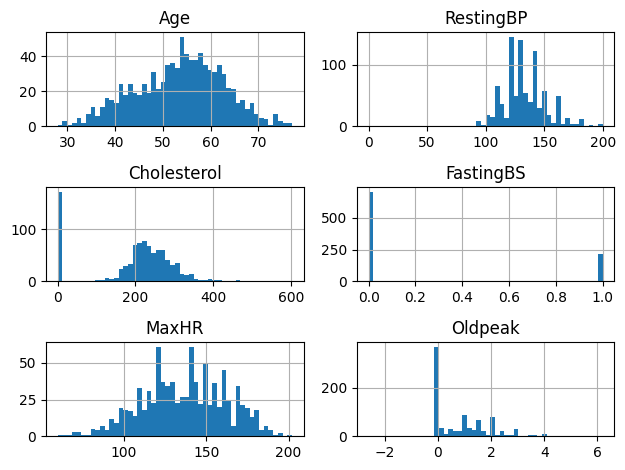

In [13]:
csv.drop(['HeartDisease'],1).hist(bins=50)
plt.tight_layout()

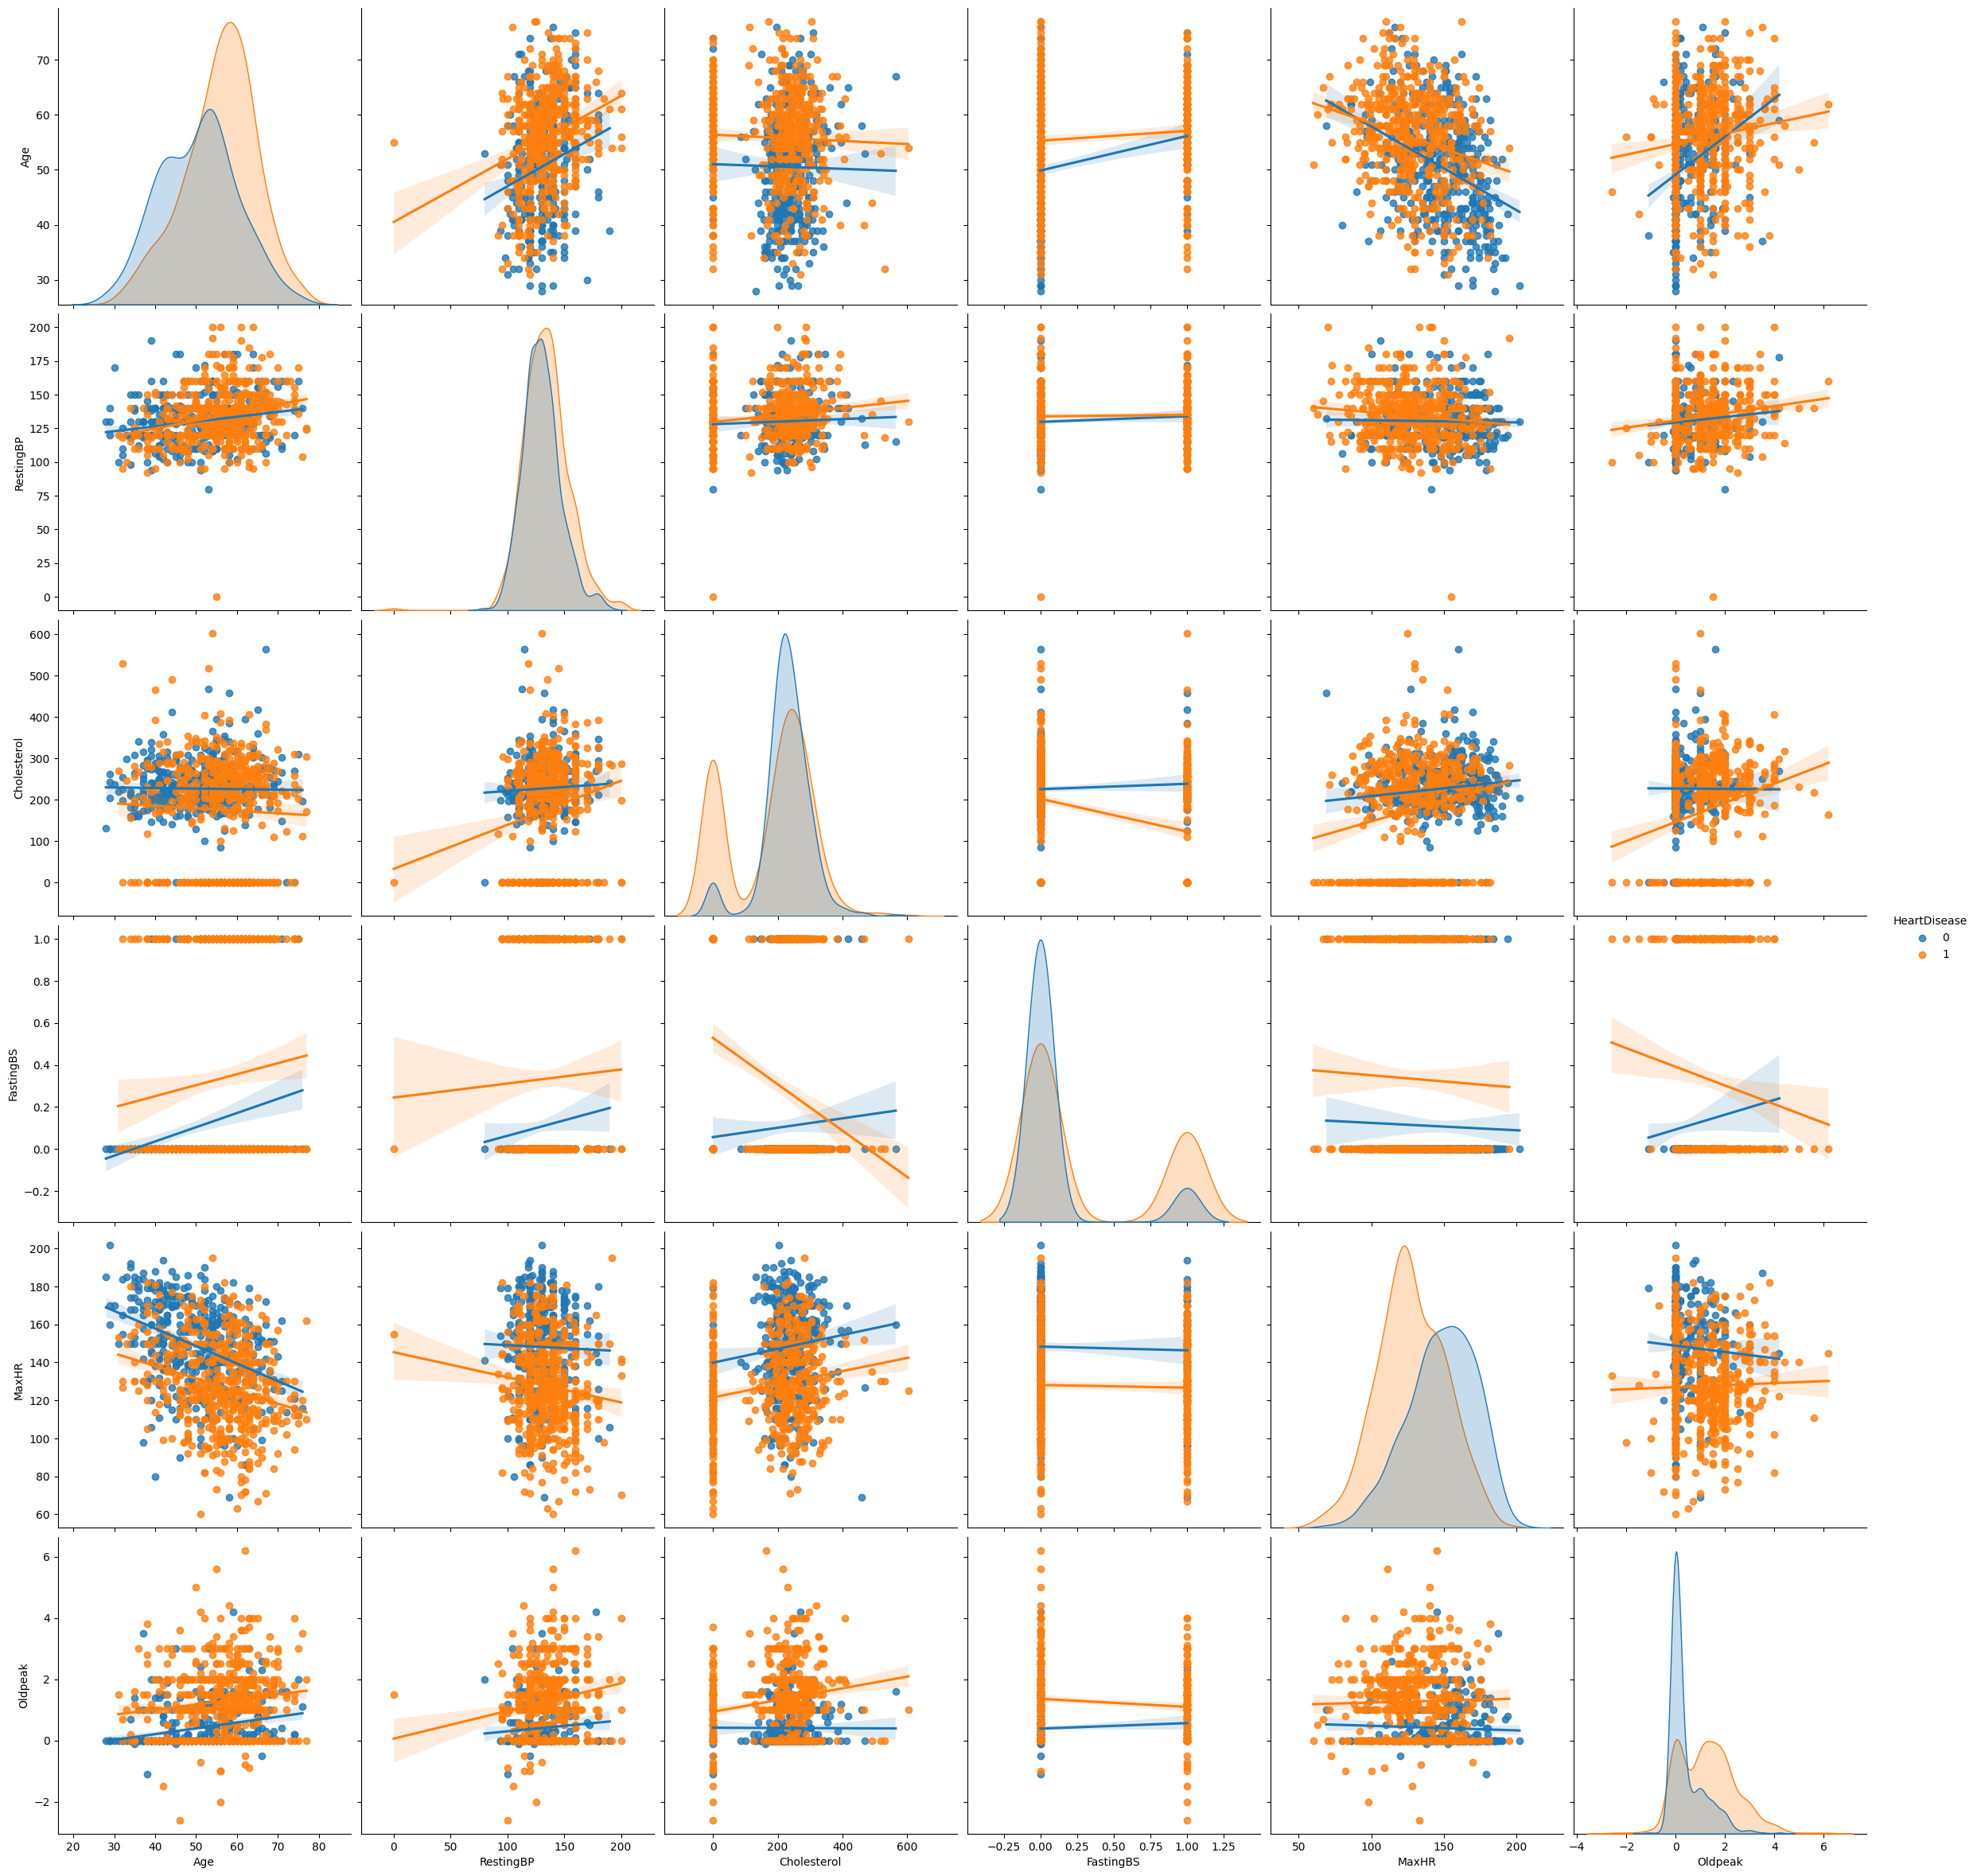

In [14]:
sns.pairplot(csv.dropna(),
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
             kind="reg");

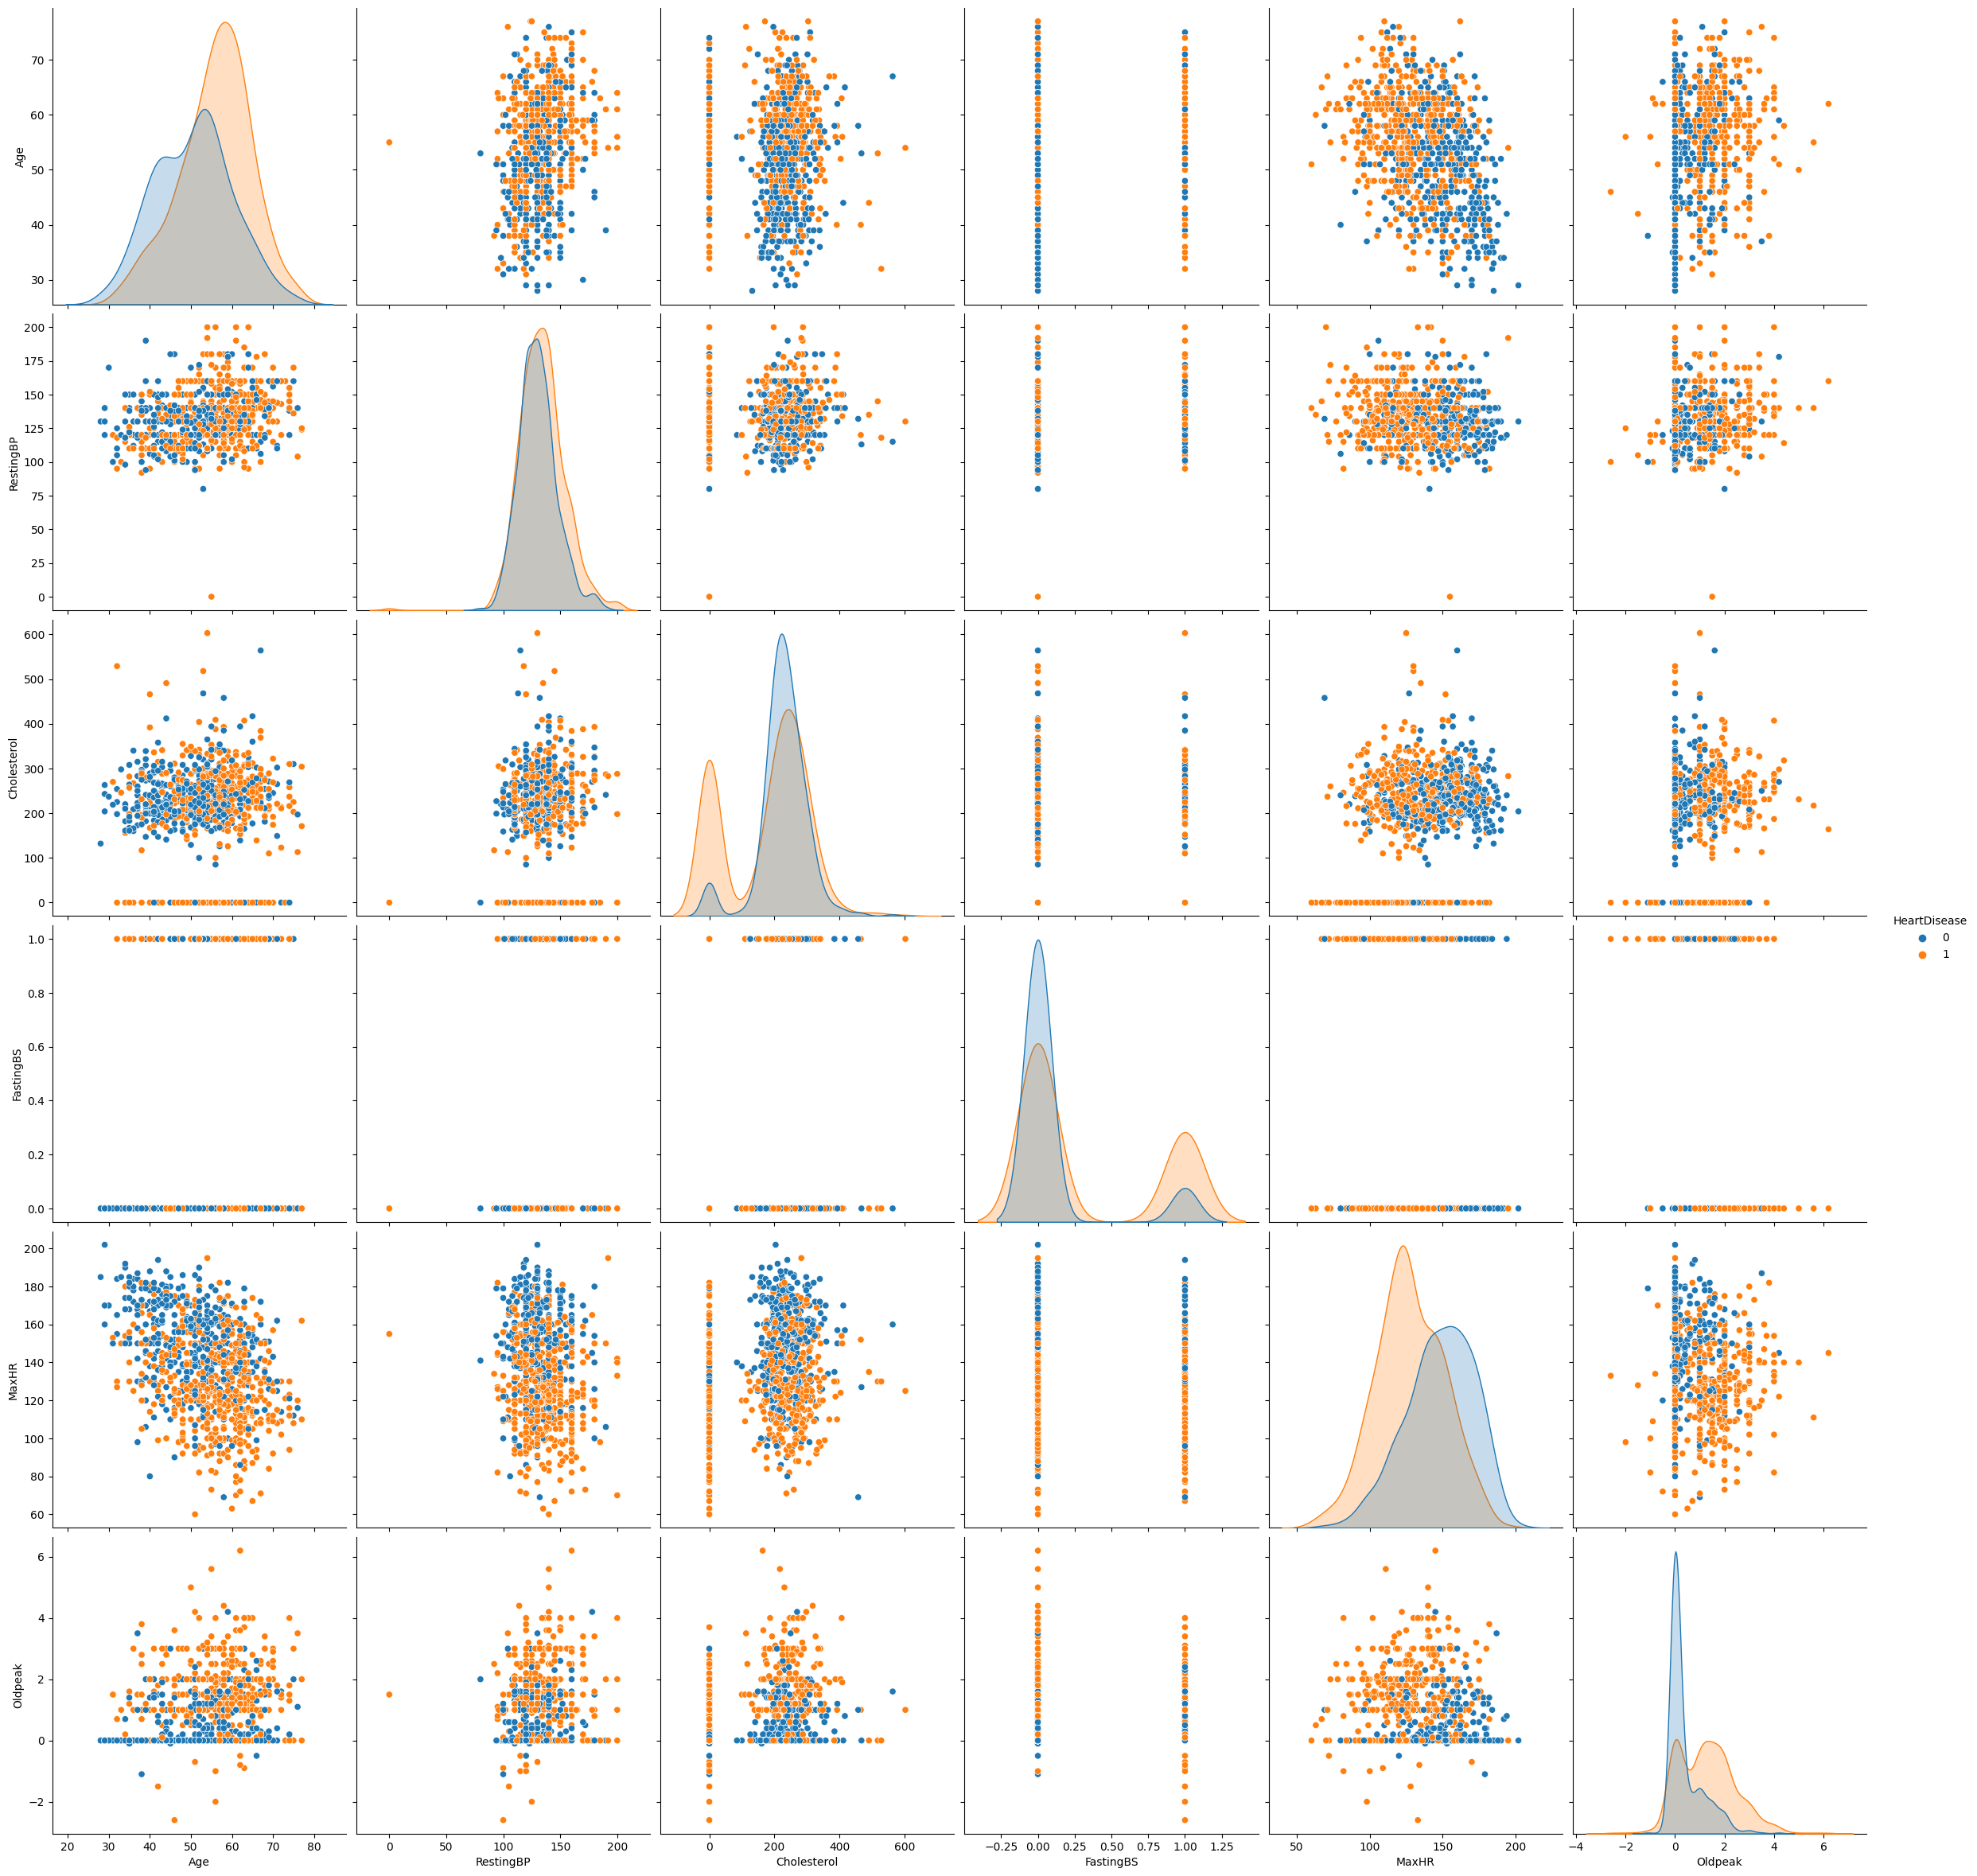

In [163]:
sns.pairplot(csv.dropna(),
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
             kind="scatter");

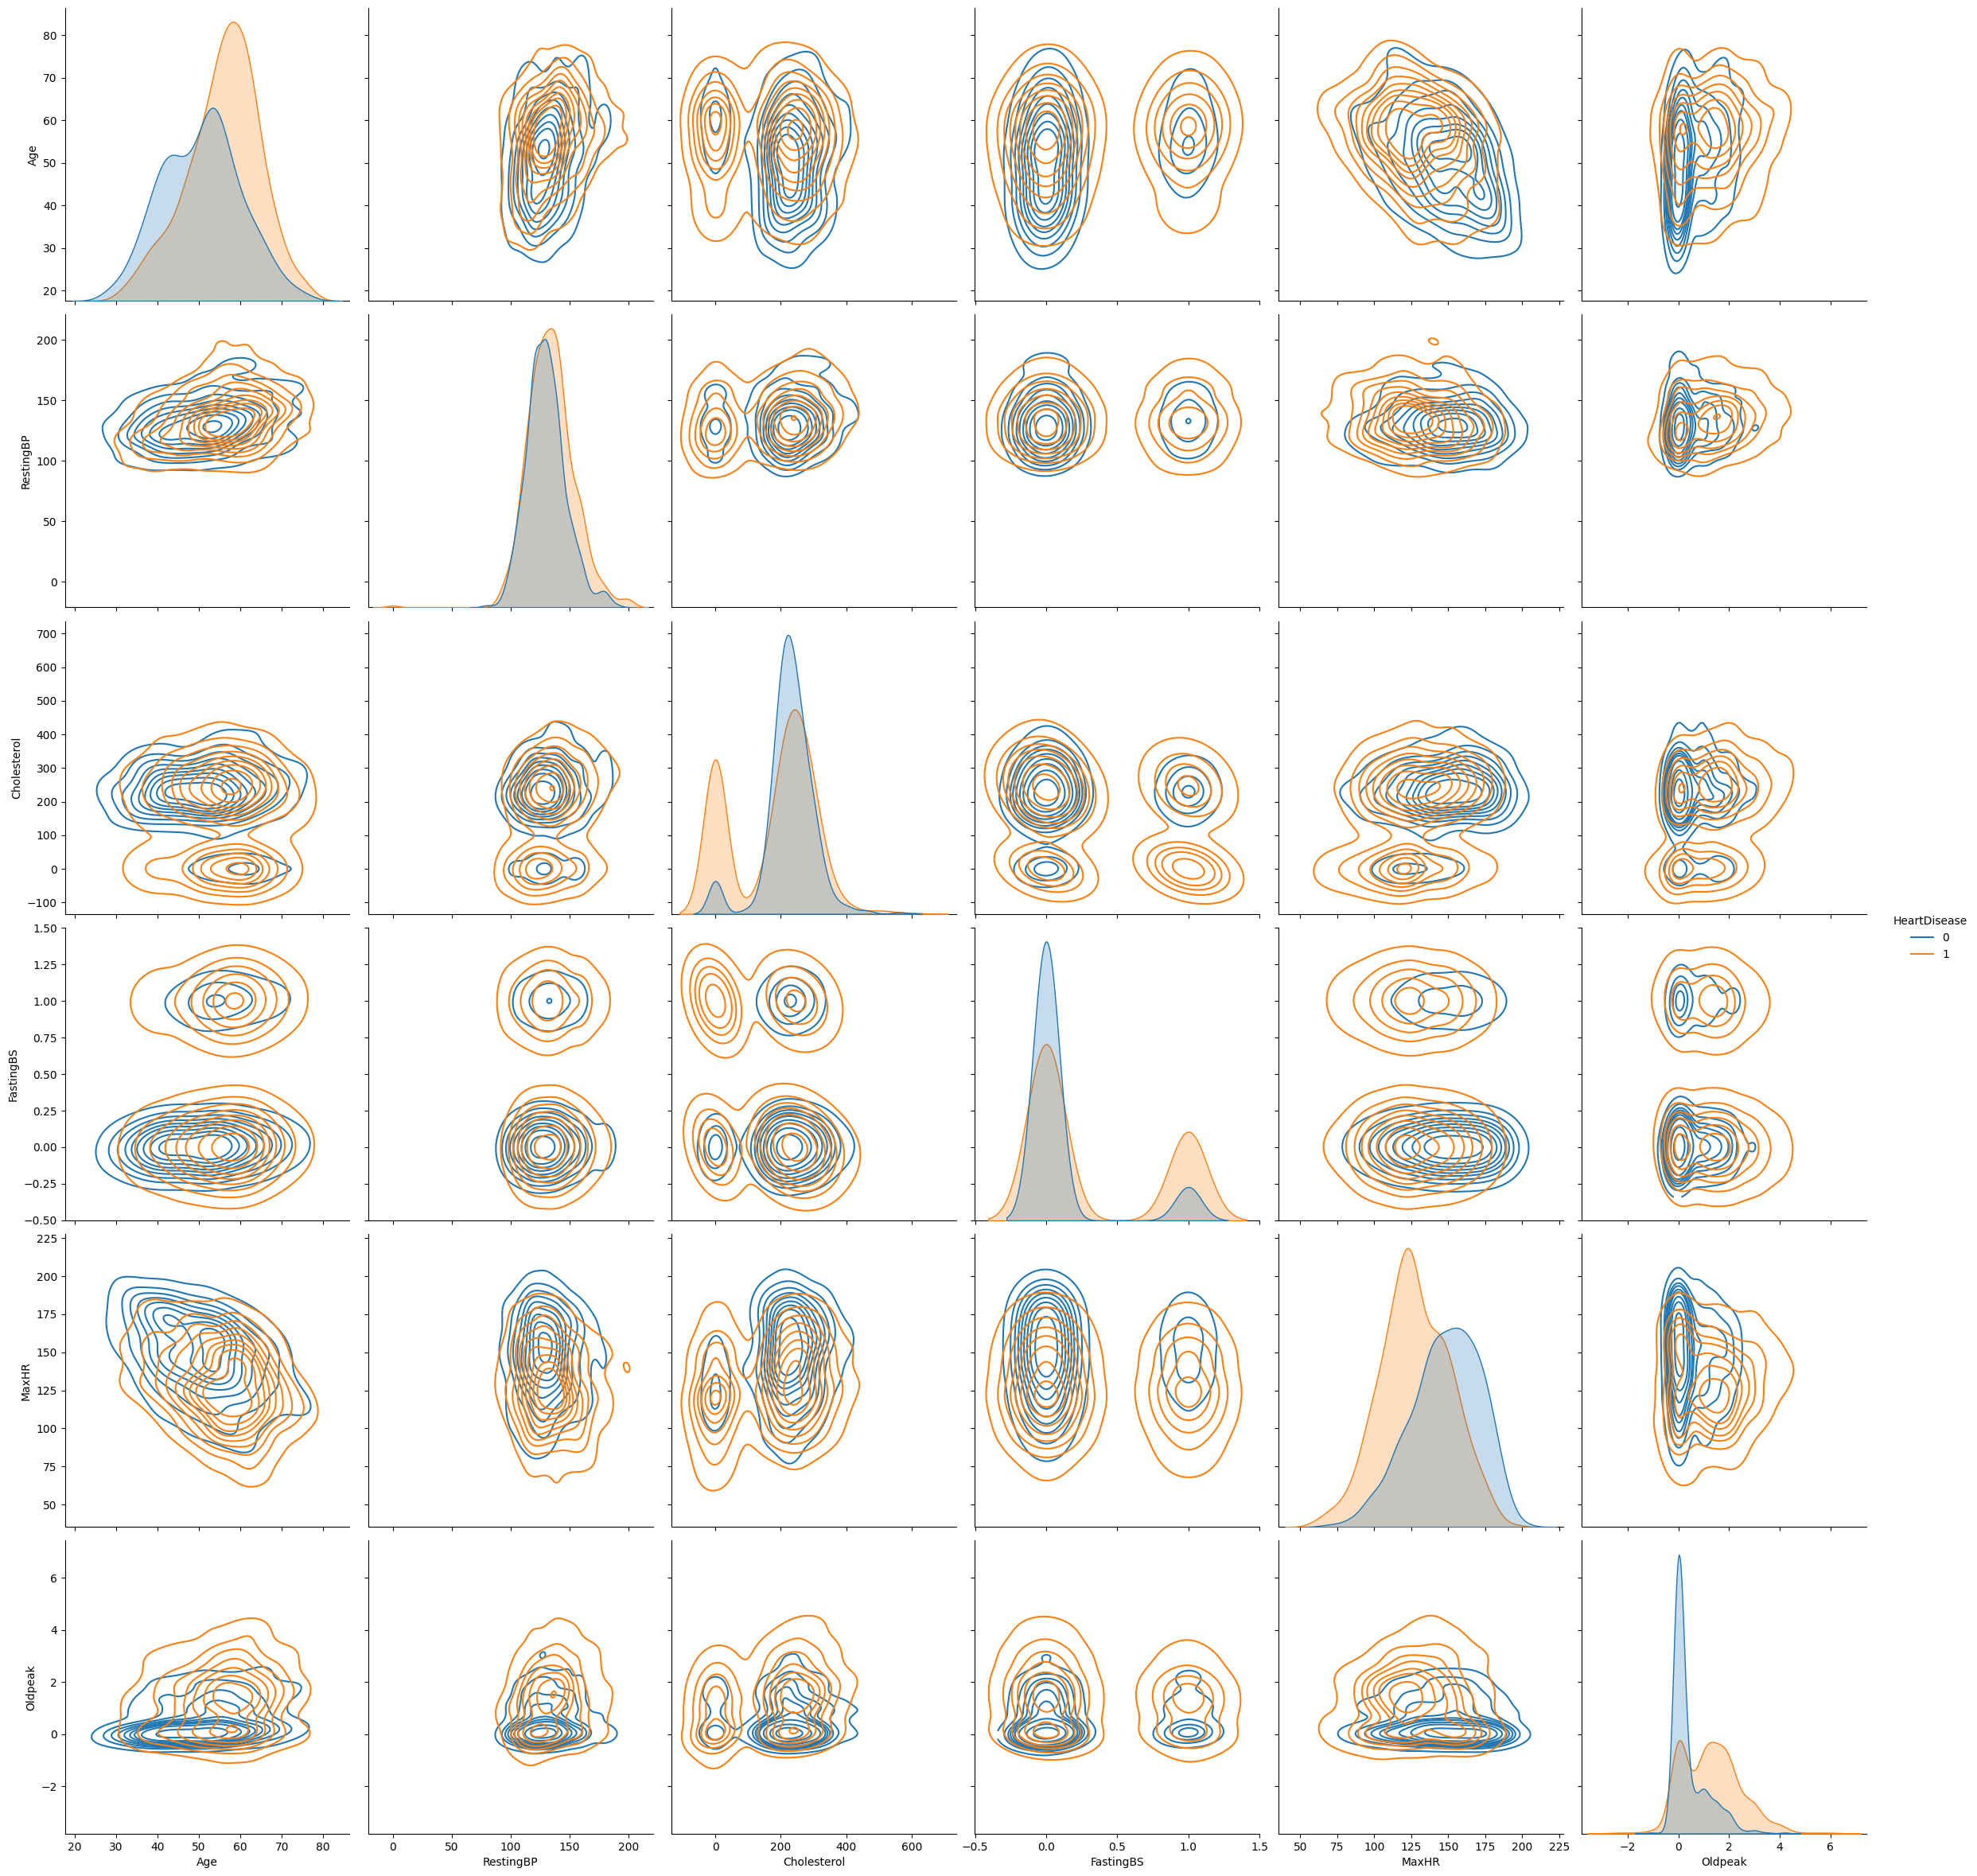

In [16]:
sns.pairplot(csv.dropna(),
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
             kind="kde");

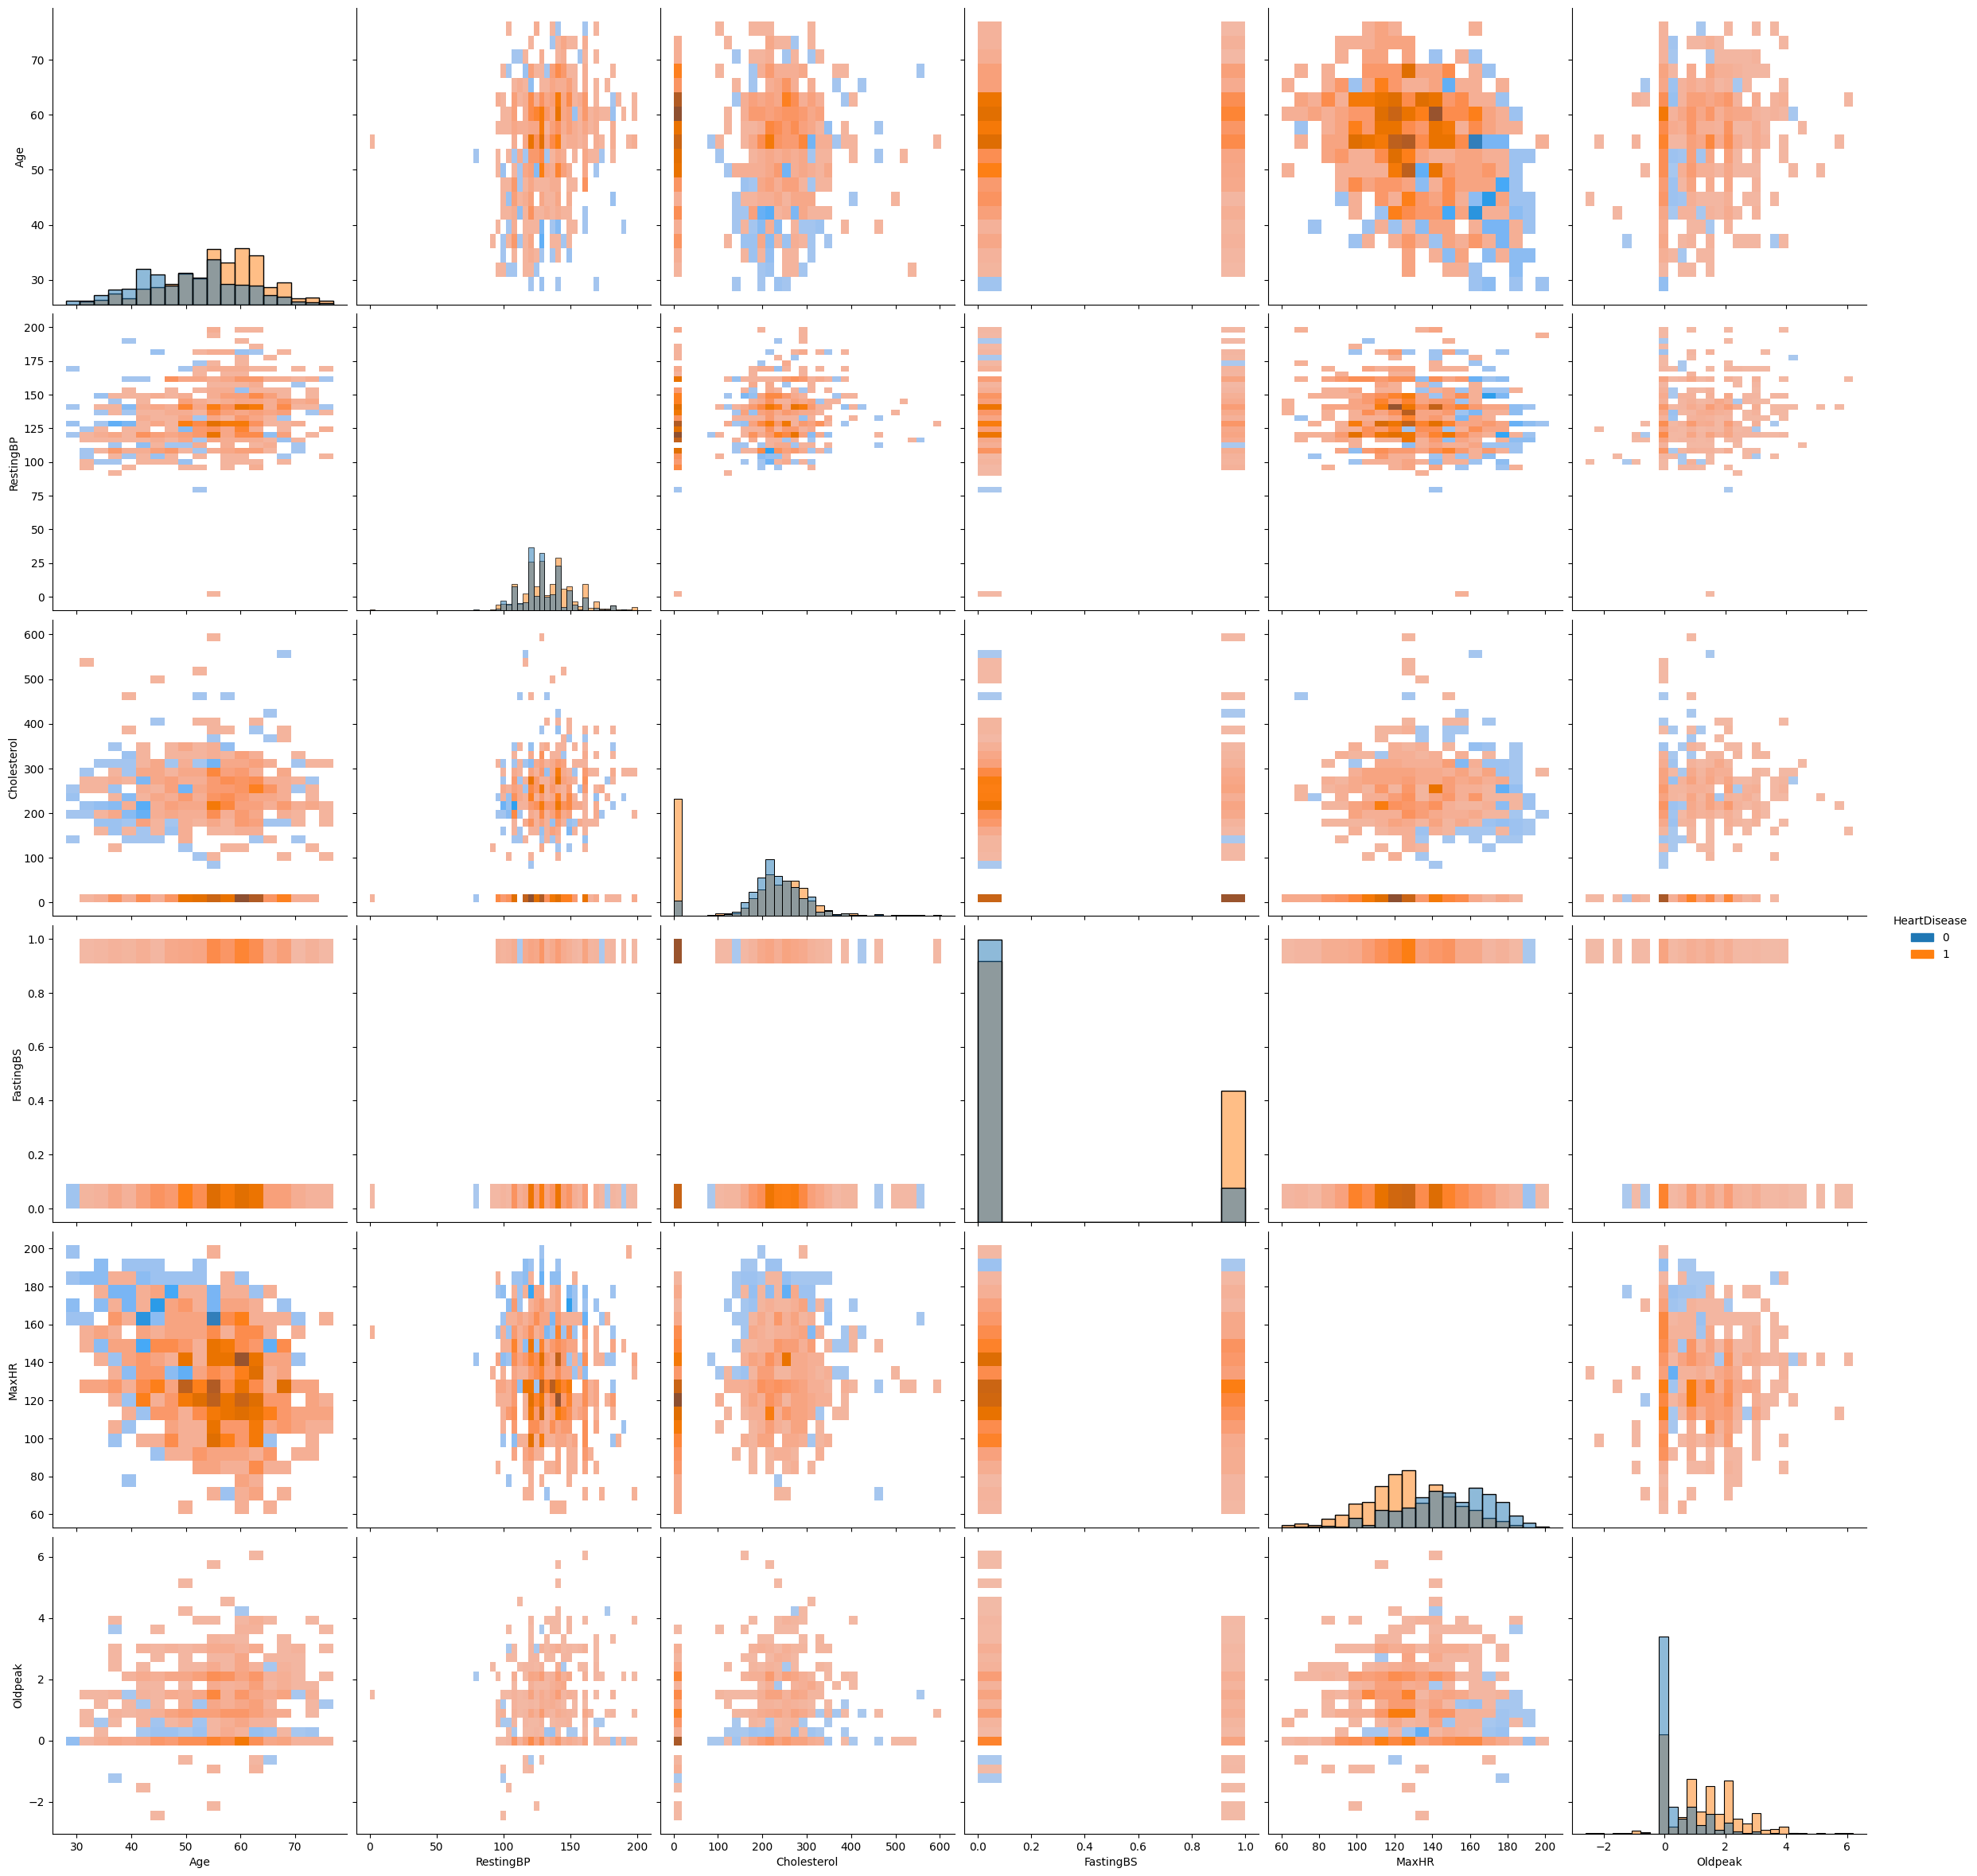

In [17]:
sns.pairplot(csv.dropna(),
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
             kind="hist");

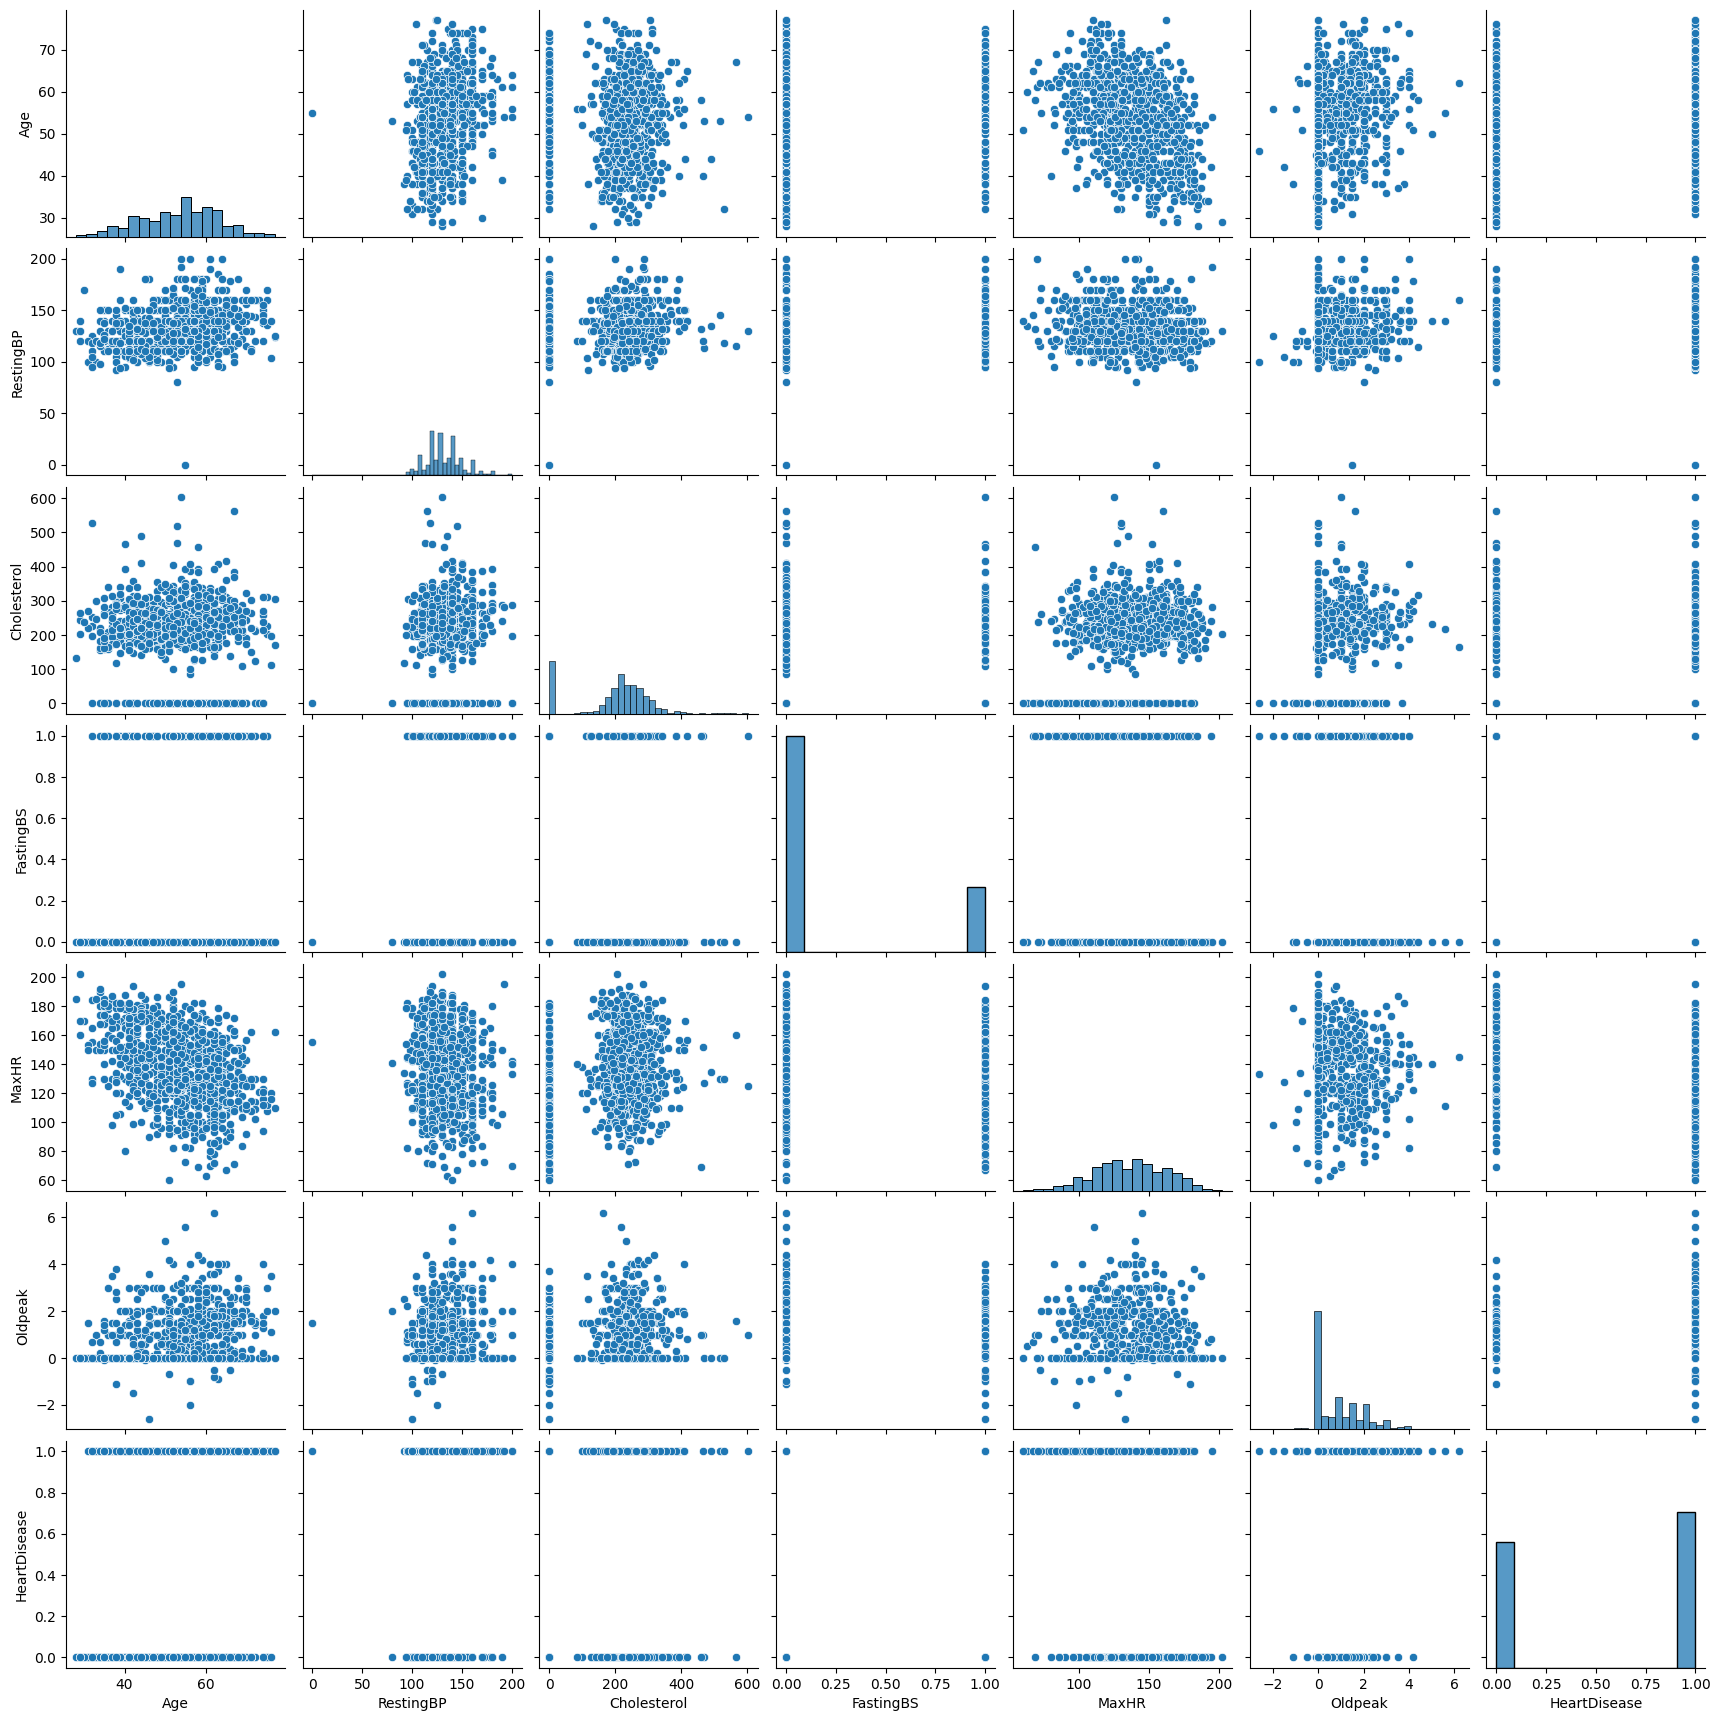

In [18]:
sns.pairplot(csv)

<AxesSubplot:>

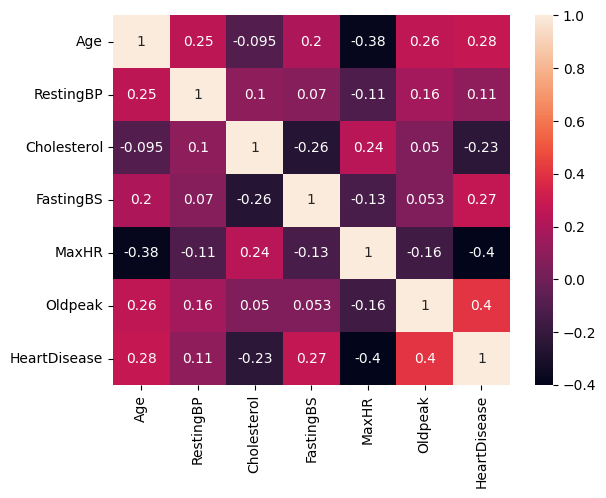

In [19]:
sns.heatmap(csv.corr(), annot=True)

In [20]:
csv.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [21]:
one_hot_csv = pd.get_dummies(csv)
one_hot_csv

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0        0      1                  0  ...                  0   
1        1      0                  0  ...                  1   
2        0      1                  0  ...                  0   
3        1      0                  1  ...                  0   
4        0      1                  0  ...                  1   
..     ...    ...                ...  ...                ...   
913      0      1                  0  ...                  0   
914      0      1                  1  ...                  0   
915      0      1                  1  ...                  0   
916      1      0                  0  ...                  0   
917      0      1                  0  ...                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 21 columns]

In [22]:
one_hot_csv.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_F                  uint8
Sex_M                  uint8
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_LVH         uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_N       uint8
ExerciseAngina_Y       uint8
ST_Slope_Down          uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

In [23]:
X = np.array(one_hot_csv.drop(['HeartDisease'], axis = 1))
y = np.array(one_hot_csv['HeartDisease'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [25]:
X_train.shape

(734, 20)

In [26]:
model = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
model = model.fit(X_train, y_train)

In [27]:
model.coef_

array([[ 0.01342664,  0.00125262, -0.00490126,  0.94047095, -0.00523298,
         0.46190568, -0.66660659,  0.56611608,  0.96135683, -0.46081887,
        -0.49542347, -0.105605  ,  0.18709368, -0.03114791, -0.25643628,
        -0.59156599,  0.49107549, -0.11049514,  1.17337808, -1.16337345]])

In [28]:
model.intercept_

array([-0.10049051])

In [29]:
dummy_csv = pd.get_dummies(csv, drop_first=True)
dummy_csv

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

In [30]:
X1 = np.array(dummy_csv.drop(['HeartDisease'], axis = 1))
y1 = np.array(dummy_csv['HeartDisease'])

In [31]:
X1_df = dummy_csv.drop(['HeartDisease'], axis=1)
X1_df

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0      1   
1     49        160          180          0    156      1.0      0   
2     37        130          283          0     98      0.0      1   
3     48        138          214          0    108      1.5      0   
4     54        150          195          0    122      0.0      1   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2      1   
914   68        144          193          1    141      3.4      1   
915   57        130          131          0    115      1.2      1   
916   57        130          236          0    174      0.0      0   
917   38        138          175          0    173      0.0      1   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                    1                  0                 0   
1                    0                  1                 0   
2                    1                  0                 0   
3                    0                  0                 0   
4                    0                  1                 0   
..                 ...                ...               ...   
913                  0                  0                 1   
914                  0                  0                 0   
915                  0                  0                 0   
916                  1                  0                 0   
917                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 15 columns]

In [32]:
y1_df = dummy_csv['HeartDisease']
y1_df

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [33]:
X1.shape

(918, 15)

In [34]:
y1.shape

(918,)

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,
                                                    y1,
                                                    test_size=0.2,
                                                    random_state = 42)

In [36]:
X1_train.shape

(734, 15)

In [37]:
model1 = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
model1 = model1.fit(X1_train, y1_train)

In [38]:
model.coef_

array([[ 0.01342664,  0.00125262, -0.00490126,  0.94047095, -0.00523298,
         0.46190568, -0.66660659,  0.56611608,  0.96135683, -0.46081887,
        -0.49542347, -0.105605  ,  0.18709368, -0.03114791, -0.25643628,
        -0.59156599,  0.49107549, -0.11049514,  1.17337808, -1.16337345]])

In [39]:
model1.coef_

array([[ 1.21312715e-02,  7.89050554e-04, -4.87201071e-03,
         9.24834758e-01, -6.13129598e-03,  4.59215180e-01,
         1.16846492e+00, -1.28322218e+00, -1.33634917e+00,
        -8.19872369e-01, -2.08745927e-01, -4.14036643e-01,
         1.09443265e+00,  1.22799983e+00, -1.07766236e+00]])

In [40]:
model.intercept_

array([-0.10049051])

In [41]:
model1.intercept_

array([-0.05576753])

In [42]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [43]:
y1_pred = model1.predict(X1_test)
y1_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [44]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

accuracy_score 0.853
precision_score 0.9
recall_score 0.841
f1_score 0.87
roc_auc_score 0.856


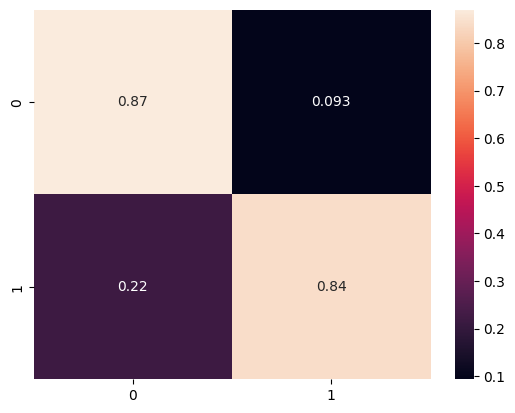

In [45]:
c_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('accuracy_score', accuracy_score(y_test,y_pred).round(3))
print('precision_score', precision_score(y_test, y_pred).round(3))
print('recall_score', recall_score(y_test, y_pred).round(3))
print('f1_score', f1_score(y_test, y_pred).round(3))
print('roc_auc_score', roc_auc_score(y_test, y_pred).round(3))

accuracy_score 0.853
precision_score 0.9
recall_score 0.841
f1_score 0.87
roc_auc_score 0.856


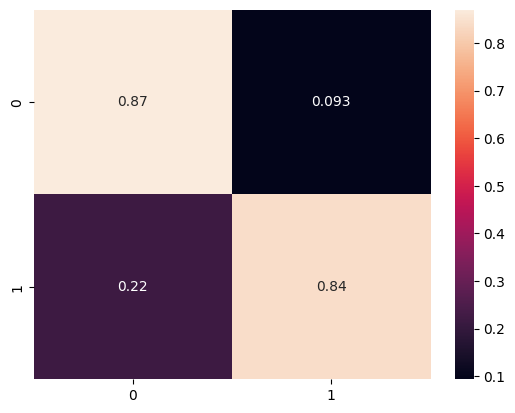

In [46]:
c_mat1 = confusion_matrix(y1_test,y1_pred)
sns.heatmap(c_mat1/c_mat1.sum(axis=1), annot=True);
print('accuracy_score', accuracy_score(y1_test,y1_pred).round(3))
print('precision_score', precision_score(y1_test, y1_pred).round(3))
print('recall_score', recall_score(y1_test, y1_pred).round(3))
print('f1_score', f1_score(y1_test, y1_pred).round(3))
print('roc_auc_score', roc_auc_score(y1_test, y1_pred).round(3))

In [47]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg_model_nonscl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_nonscl)

[0.93243243 0.87837838 0.87837838 0.86486486 0.8630137  0.82191781
 0.80821918 0.89041096 0.87671233 0.83561644]
Logistic Regression: 0.864994 (0.034111)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [49]:
model.fit(X_train_scl, y_train)

LogisticRegression(solver='liblinear')

In [50]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train_scl, y_train, cv=kfold, scoring='accuracy')

msg_model_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_scl)

[0.91891892 0.87837838 0.87837838 0.87837838 0.83561644 0.82191781
 0.80821918 0.89041096 0.87671233 0.83561644]
Logistic Regression: 0.862255 (0.033104)


In [51]:
from sklearn.model_selection import KFold, cross_val_score
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model1, X1_train, y1_train, cv=kfold, scoring='accuracy')

msg_model1_nonscl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model1_nonscl)

[0.93243243 0.87837838 0.87837838 0.86486486 0.8630137  0.82191781
 0.80821918 0.87671233 0.89041096 0.84931507]
Logistic Regression: 0.866364 (0.033165)


In [52]:
X1_train_scl = scaler.fit_transform(X1_train)
X1_test_scl = scaler.transform(X1_test)
model1.fit(X1_train_scl, y1_train)

LogisticRegression(solver='liblinear')

In [53]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model1, X1_train_scl, y1_train, cv=kfold, scoring='accuracy')

msg_model1_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model1_scl)

[0.93243243 0.89189189 0.87837838 0.87837838 0.83561644 0.82191781
 0.80821918 0.89041096 0.87671233 0.83561644]
Logistic Regression: 0.864957 (0.036357)


In [54]:
print('msg_model_nonscl', msg_model_nonscl)
print('msg_model_scl', msg_model_scl)
print('msg_model1_nonscl', msg_model1_nonscl)
print('msg_model1_scl', msg_model1_scl)

msg_model_nonscl Logistic Regression: 0.864994 (0.034111)
msg_model_scl Logistic Regression: 0.862255 (0.033104)
msg_model1_nonscl Logistic Regression: 0.866364 (0.033165)
msg_model1_scl Logistic Regression: 0.864957 (0.036357)


In [55]:
y_pred = model.predict(X_test)
y_pred_scl = model.predict(X_test_scl)
y1_pred = model1.predict(X1_test)
y1_pred_scl = model1.predict(X1_test_scl)

In [56]:
# one hot sin escalar -> sin escalar
oh_accuracy_score_nonscl = accuracy_score(y_test,y_pred).round(3)
oh_precision_score_nonscl = precision_score(y_test, y_pred).round(3)
oh_recall_score_nonscl = recall_score(y_test, y_pred).round(3)
oh_f1_score_nonscl = f1_score(y_test, y_pred).round(3)
oh_roc_auc_score_nonscl = roc_auc_score(y_test, y_pred).round(3)

In [57]:
# one hot escalado
oh_accuracy_score_scl = precision_score(y_test, y_pred_scl).round(3)
oh_precision_score_scl = precision_score(y_test, y_pred_scl).round(3)
oh_recall_score_scl = recall_score(y_test, y_pred_scl).round(3)
oh_f1_score_scl = f1_score(y_test, y_pred_scl).round(3)
oh_roc_auc_score_scl = roc_auc_score(y_test, y_pred_scl).round(3)


In [58]:
# get dummies sin escalar -> No incluir
gd_accuracy_score_nonscl = accuracy_score(y1_test,y1_pred).round(3)
gd_precision_score_nonscl = precision_score(y1_test, y1_pred).round(3)
gd_recall_score_nonscl = recall_score(y1_test, y1_pred).round(3)
gd_f1_score_nonscl = f1_score(y1_test, y1_pred).round(3)
gd_roc_auc_score_nonscl = roc_auc_score(y1_test, y1_pred).round(3)

In [59]:
# get dummines escalado
gd_accuracy_score_scl =  accuracy_score(y1_test,y1_pred_scl).round(3)
gd_precision_score_scl =  precision_score(y1_test, y1_pred_scl).round(3)
gd_recall_score_scl = recall_score(y1_test, y1_pred_scl).round(3)
gd_f1_score_scl = f1_score(y1_test, y1_pred_scl).round(3)
gd_roc_auc_score_scl = roc_auc_score(y1_test, y1_pred_scl).round(3)

In [60]:
accuracy = (oh_accuracy_score_nonscl,oh_accuracy_score_scl,gd_accuracy_score_nonscl,gd_accuracy_score_scl)
precision = (oh_precision_score_nonscl,oh_precision_score_scl,gd_precision_score_nonscl,gd_precision_score_scl)
recall = (oh_recall_score_nonscl,oh_recall_score_scl,gd_recall_score_nonscl,gd_recall_score_scl)
f1 = (oh_f1_score_nonscl,oh_f1_score_scl,gd_f1_score_nonscl,gd_f1_score_scl)
roc = (oh_roc_auc_score_nonscl,oh_roc_auc_score_scl,gd_roc_auc_score_nonscl, gd_roc_auc_score_scl)

In [67]:
scores_dict = {'acc':accuracy,'prec':precision,'rec':recall,'f1':f1,'roc':roc}

In [62]:
scores_df = pd.DataFrame(scores_dict, index=['one hot not scaled','one hot scaled','get dummies not scaled'
                                                ,'get dummies scaled'])
scores_df

acc   prec    rec     f1    roc
one hot not scaled      0.527  0.955  0.196  0.326  0.592
one hot scaled          0.900  0.900  0.841  0.870  0.856
get dummies not scaled  0.516  0.950  0.178  0.299  0.582
get dummies scaled      0.853  0.900  0.841  0.870  0.856

In [63]:
scores_df.describe()

acc     prec       rec        f1       roc
count  4.000000  4.00000  4.000000  4.000000  4.000000
mean   0.699000  0.92625  0.514000  0.591250  0.721500
std    0.205905  0.03038  0.377659  0.322061  0.155361
min    0.516000  0.90000  0.178000  0.299000  0.582000
25%    0.524250  0.90000  0.191500  0.319250  0.589500
50%    0.690000  0.92500  0.518500  0.598000  0.724000
75%    0.864750  0.95125  0.841000  0.870000  0.856000
max    0.900000  0.95500  0.841000  0.870000  0.856000

In [64]:
# Gaussian en one hot scaled
from sklearn.naive_bayes import GaussianNB
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_scl, y_train)
gnb_pred = fit_std.predict(X_test_scl)


In [65]:
gnb_accuracy_score_scl =  accuracy_score(y_test,gnb_pred).round(3)
gnb_precision_score_scl =  precision_score(y_test, gnb_pred).round(3)
gnb_recall_score_scl = recall_score(y_test, gnb_pred).round(3)
gnb_f1_score_scl = f1_score(y_test, gnb_pred).round(3)
gnb_roc_auc_score_scl = roc_auc_score(y_test, gnb_pred).round(3)


In [66]:
accuracy = (oh_accuracy_score_nonscl,oh_accuracy_score_scl,gd_accuracy_score_nonscl,gd_accuracy_score_scl,gnb_accuracy_score_scl)
precision = (oh_precision_score_nonscl,oh_precision_score_scl,gd_precision_score_nonscl,gd_precision_score_scl,gnb_precision_score_scl)
recall = (oh_recall_score_nonscl,oh_recall_score_scl,gd_recall_score_nonscl,gd_recall_score_scl,gnb_recall_score_scl)
f1 = (oh_f1_score_nonscl,oh_f1_score_scl,gd_f1_score_nonscl,gd_f1_score_scl,gnb_f1_score_scl)
roc = (oh_roc_auc_score_nonscl,oh_roc_auc_score_scl,gd_roc_auc_score_nonscl, gd_roc_auc_score_scl,gnb_roc_auc_score_scl)

In [70]:
scores_df = pd.DataFrame(scores_dict, index=['Onehot notscaled','Onehot scaled','Getdummies notscaled'
                                                ,'Getdummies scaled', 'Gaussian onehot scaled'])
scores_df

acc   prec    rec     f1    roc
Onehot notscaled        0.527  0.955  0.196  0.326  0.592
Onehot scaled           0.900  0.900  0.841  0.870  0.856
Getdummies notscaled    0.516  0.950  0.178  0.299  0.582
Getdummies scaled       0.853  0.900  0.841  0.870  0.856
Gaussian onehot scaled  0.864  0.927  0.832  0.877  0.870

In [ ]:
# maximizamos el recall

In [92]:
# Gaussian
from sklearn import metrics
pred_train_std_gb = fit_std.predict(X_train_scl)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std_gb)))

pred_test_std_gb = fit_std.predict(X_test_scl)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std_gb)))


Prediction accuracy for the training dataset
85.83%

Prediction accuracy for the test dataset
86.41%



In [93]:
# Log. Regression
pred_train_std_model = model.predict(X_train_scl)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std_model)))

pred_test_std_model = model.predict(X_test_scl)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std_model)))


Prediction accuracy for the training dataset
87.19%

Prediction accuracy for the test dataset
85.33%



In [88]:
print('Gaussian','\n', metrics.confusion_matrix(y_train, pred_train_std_gb))
print('Logistic Regression','\n', metrics.confusion_matrix(y_train, pred_train_std_model))

Gaussian 
 [[279  54]
 [ 50 351]]
Logistic Regression 
 [[280  53]
 [ 41 360]]


In [94]:
print('Gaussian','\n', metrics.confusion_matrix(y_test, pred_test_std_gb))
print('Logistic Regression','\n', metrics.confusion_matrix(y_test, pred_test_std_model))

Gaussian 
 [[70  7]
 [18 89]]
Logistic Regression 
 [[67 10]
 [17 90]]


In [95]:
name='Logistic Regression GetDummies'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model1, X1_train_scl, y1_train, cv=kfold, scoring='accuracy')

msg_model1_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model1_scl)

[0.93243243 0.89189189 0.87837838 0.87837838 0.83561644 0.82191781
 0.80821918 0.89041096 0.87671233 0.83561644]
Logistic Regression: 0.864957 (0.036357)


In [99]:
name='Logistic Regression OneHot'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train_scl, y_train, cv=kfold, scoring='accuracy')

msg_model_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_scl)

[0.91891892 0.87837838 0.87837838 0.87837838 0.83561644 0.82191781
 0.80821918 0.89041096 0.87671233 0.83561644]
Logistic Regression OneHot: 0.862255 (0.033104)


In [98]:
name='Gaussian'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(fit_std, X_train_scl, y_train, cv=kfold, scoring='accuracy')

msg_model_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_scl)

[0.90540541 0.87837838 0.87837838 0.87837838 0.82191781 0.79452055
 0.84931507 0.87671233 0.87671233 0.79452055]
Gaussian: 0.855424 (0.036829)


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
pipe = Pipeline(steps=[("classifier", RandomForestClassifier())])

logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.arange(0.1, 4, 0.5)
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [1000,1500,2000],
    'classifier__max_features': [1,2,3],
    
}

svc_params = {
    'classifier': [svm.SVC()],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid']
}

search_space = [logistic_params, random_forest_params, svc_params]

grid = GridSearchCV(pipe,
                   search_space,
                   cv = 10,
                   n_jobs=-1)

grid.fit(X_train, y_train)

In [165]:
# revisar -> modificaciones propuestas por Julia TA
pipe = Pipeline(steps=[("classifier", RandomForestClassifier())])

logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.arange(0.1, 4, 0.5)
}

random_forest_params = {
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [100,300,500],
    'max_depth' : [3,5,7]
    
}

svc_params = {
    'classifier': [svm.SVC()],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid']
}

search_space = [logistic_params, random_forest_params, svc_params]

grid = GridSearchCV(pipe,
                   search_space,
                   cv = 10,
                   n_jobs=-1)

grid.fit(X_train, y_train)

ValueError: Invalid parameter max_depth for estimator Pipeline(steps=[('classifier', RandomForestClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [106]:
print("Best estimator:", grid.best_estimator_)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=3, n_estimators=1000))])
Best params: {'classifier': RandomForestClassifier(max_features=3, n_estimators=1000), 'classifier__max_features': 3, 'classifier__n_estimators': 1000}
Best score: 0.8786190299888931


In [132]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())])

svc = Pipeline([
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svc", svm.SVC())])

rand_forest_param = {
    'n_estimators': [10,50,100,500,1000],
    'max_features': [1,2,3],
    'min_samples_leaf' : [5,10,20]
}

rand_forest = RandomForestClassifier()

re_log_param = {
    "imputer__strategy": ['mean', 'median', 'most_frequent'],
    "reglog__penalty": ["l1", "l2"],
    "reglog__C": np.arange(0.1, 4, 0.5)
}

svc_param = {
    "selectkbest__k": [1,2,3],
    "svc__C": np.arange(0.1, 0.9, 0.1),
    "svc__kernel": ['linear', 'poly', 'rbf']
}

gs_reg_log = GridSearchCV(reg_log,
re_log_param,
cv=10,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1)

gs_svm = GridSearchCV(svc,
svc_param,
cv=10,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1)

gs_rand_forest = GridSearchCV(rand_forest,
rand_forest_param,
cv=10,
scoring = 'accuracy',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_reg_log": gs_reg_log,
    "gs_svm": gs_svm,
    "gs_rand_forest": gs_rand_forest}

In [133]:
grids.items()

dict_items([('gs_reg_log', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('reglog', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'reglog__C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6]),
                         'reglog__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)), ('gs_svm', GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3],
                         'svc__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
    

In [134]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Wall time: 2min 37s


In [136]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]
best_grids

[('gs_reg_log', 0.8677341725286931),
 ('gs_svm', 0.826823398741207),
 ('gs_rand_forest', 0.878619029988893)]

In [137]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

Grid  Best score
2  gs_rand_forest    0.878619
0      gs_reg_log    0.867734
1          gs_svm    0.826823

In [128]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

Grid  Best score
2  gs_rand_forest    0.877268
0      gs_reg_log    0.867734
1          gs_svm    0.826823

In [120]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

Grid  Best score
2  gs_rand_forest    0.878638
0      gs_reg_log    0.867734
1          gs_svm    0.826823

In [138]:
print("Best estimator:", gs_rand_forest.best_estimator_)
print("Best params:", gs_rand_forest.best_params_)
print("Best score:", gs_rand_forest.best_score_)

Best estimator: RandomForestClassifier(max_features=2, n_estimators=500)
Best params: {'max_features': 2, 'n_estimators': 500}
Best score: 0.878619029988893


In [121]:
print("Best estimator:", gs_rand_forest.best_estimator_)
print("Best params:", gs_rand_forest.best_params_)
print("Best score:", gs_rand_forest.best_score_)

Best estimator: RandomForestClassifier(max_features=3, n_estimators=500)
Best params: {'max_features': 3, 'n_estimators': 500}
Best score: 0.8786375416512403


In [139]:
pred_forest_test = gs_rand_forest.predict(X_test)
pred_forest_train = gs_rand_forest.predict(X_train)
print('Pipe train','\n', metrics.confusion_matrix(y_train, pred_forest_train))
print('Pipe test','\n', metrics.confusion_matrix(y_test, pred_forest_test))

Pipe train 
 [[333   0]
 [  0 401]]
Pipe test 
 [[67 10]
 [13 94]]


In [129]:
pred_forest_test = gs_rand_forest.predict(X_test)

In [130]:
pred_forest_train = gs_rand_forest.predict(X_train)

In [131]:
print('Pipe train','\n', metrics.confusion_matrix(y_train, pred_forest_train))
print('Pipe test','\n', metrics.confusion_matrix(y_test, pred_forest_test))

Pipe train 
 [[332   1]
 [  0 401]]
Pipe test 
 [[69  8]
 [15 92]]


In [140]:
from flaml import AutoML

AutoML_model = AutoML()
AutoML_model_settings = {
    "time_budget": 600,
    "metric": 'accuracy',
    "task": 'classification',
    "verbose": 1,
    "n_jobs": -1,
    "eval_method": 'cv',
    "n_splits":3
}

In [150]:
AutoML_model.fit(X_train, y_train, **AutoML_model_settings)

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 618, 'num_leaves': 4, 'min_child_samples': 22, 'learning_rate': 0.04260920704106743, 'log_max_bin': 10, 'colsample_bytree': 0.6532254442656418, 'reg_alpha': 3.527459761073777, 'reg_lambda': 8.466979874888542}
Training duration of best run: {0:.4g} s 0.11381864547729492
Scoring Metrics for FLAML AutoML (Validation)
Balanced Accuracy Score = 0.8789901687097949
Accuracy Score = 0.8804347826086957
Precision Score = 0.9047619047619048
F1 Score = 0.8962264150943396
Recall Score = 0.8878504672897196
ROC AUC Score = 0.8789901687097949
Confusion Matrix
[[67 10]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

Scoring Metrics for FLAML AutoML (Train

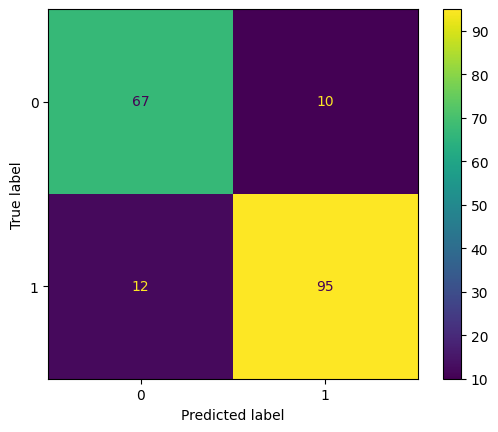

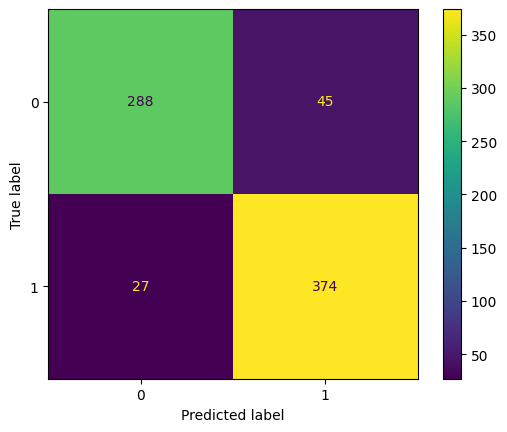

In [153]:
print('Best ML leaner:', AutoML_model.best_estimator)
print('Best hyperparmeter config:', AutoML_model.best_config)
print('Training duration of best run: {0:.4g} s', AutoML_model.best_config_train_time)
pred_train_Auto = AutoML_model.predict(X_train)
pred_test_Auto = AutoML_model.predict(X_test)
predicted_test = pd.DataFrame(pred_test_Auto)
predicted_train = pd.DataFrame(pred_train_Auto)
print('=============================================')
print('Scoring Metrics for FLAML AutoML (Validation)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_test, predicted_test)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_test, predicted_test)))
print('Precision Score = {}'.format(metrics.precision_score(y_test, predicted_test)))
print('F1 Score = {}'.format(metrics.f1_score(y_test, predicted_test, labels=['0','1'])))
print('Recall Score = {}'.format(metrics.recall_score(y_test, predicted_test, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_test, predicted_test, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_test, predicted_test))
print('==================')
print(metrics.classification_report(y_test, predicted_test, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, predicted_test)).plot()


print('=============================================')
print('Scoring Metrics for FLAML AutoML (Training)')
print('=============================================')
print('Balanced Accuracy Score = {}'.format(metrics.balanced_accuracy_score(y_train, predicted_train)))
print('Accuracy Score = {}'.format(metrics.accuracy_score(y_train, predicted_train)))
print('Precision Score = {}'.format(metrics.precision_score(y_train, predicted_train)))
print('F1 Score = {}'.format(metrics.f1_score(y_train, predicted_train)))
print('Recall Score = {}'.format(metrics.recall_score(y_train, predicted_train, labels=['0','1'])))
print('ROC AUC Score = {}'.format(metrics.roc_auc_score(y_train, predicted_train, labels=['0','1'])))
print('Confusion Matrix')
print('==================')
print(metrics.confusion_matrix(y_train, predicted_train))
print('==================')
print(metrics.classification_report(y_train, predicted_train, target_names=['0','1']))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, predicted_train)).plot()

In [154]:
AutoML_model.fit(X_train_scl, y_train, **AutoML_model_settings)